In [1]:
import tensorflow as tf
import numpy as np

In [27]:
class Momentum(tf.Module):

  def __init__(self, learning_rate=1e-3, momentum=0.7):
    # Initialize parameters
    self.learning_rate = learning_rate
    self.momentum = momentum
    self.change = 0.
    self.title = f"Gradient descent optimizer: learning rate={self.learning_rate}"

  def apply_gradients(self, grads, vars):
    # Update variables 
    for grad, var in zip(grads, vars):
      curr_change = self.learning_rate*grad + self.momentum*self.change
      var.assign_sub(curr_change)
      self.change = curr_change

optimizer

In [28]:
#https://www.tensorflow.org/guide/core/optimizers_core
class GradientDescent(tf.Module):

  def __init__(self, learning_rate=1e-3):
    # Initialize parameters
    self.learning_rate = learning_rate
    self.title = f"Gradient descent optimizer: learning rate={self.learning_rate}"

  def apply_gradients(self, grads, vars):
    # Update variables
    for grad, var in zip(grads, vars):
      var.assign_sub(self.learning_rate*grad)

In [4]:
a = 1
b = 1
c = 1
y0 = 1.
y0_prime = 0.


def g(t):
    return np.cos(t) 

In [30]:
def inh(t,NN,g):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        u = NN(t)
        dnn = tape.gradient(u, t)
        ddnn = tape.gradient(dnn,t)
    ode_loss =  (a * ddnn + b * dnn + c * u - g(t))
   
    iv_loss = NN(t_0) # we preceed with one intital value loss y_prime
    square_loss = tf.square(ode_loss) + tf.square(iv_loss)
    return square_loss


In [6]:
# with tf.GradientTape(persistent=True) as tape: 
#     loss = inh(train_t,NN,g)
# grad = tape.gradient(loss, trainable_vars)
# grad

In [29]:
NN = tf.keras.models.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(units = 32, activation = tf.keras.activations.relu), #2 additional layers

    tf.keras.layers.Dense(units = 1)
])

In [8]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record1 = []
def train(epochs = 300):
    trainable_vars = NN.trainable_variables
    optimizer = Momentum()
    for _ in range(epochs):
        with tf.GradientTape(persistent=True) as tape: 
            loss = inh(train_t,NN,g)
        grad = tape.gradient(loss, trainable_vars)
        optimizer.apply_gradients(grad, trainable_vars)
        train_loss_record1.append(loss)




In [9]:
y_pred = NN.predict(train_t)

1/1 [==============================] - 0s 350ms/step


plot


In [12]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

In [13]:
t = np.linspace(0,1,10**2)
t = t.reshape((t.shape[0],1))

In [14]:
w,r,O,B = 1,1,1,1
def solution(t):
    A = 1/(-t**2*O**2 + 1j*r*t*O + w**2)
    Z = A*E**(1j*O*t)
    return  float(re(Z))
def solution(t):
    return np.sin(t)

In [15]:
from tensorflow.python.ops import math_ops
def trapezoid(t, y):
    return math_ops.reduce_sum(
            math_ops.multiply( t[1:] - t[:-1],
                              (y[:-1] + y[1:]) / 2.))
            #  name='trapezoidal_integral_approx')
np.sqrt ( trapezoid(t,(NN(t) - solution(t))**2) )


0.50634885

In [14]:

# fig, axs = plt.subplots(1)
# axs.set_xlabel("t")
# axs.set_ylabel("pred")
# axs.plot(train_t,"b")
# axs.plot(train_t, [solution(t[0]) for t in train_t],"r")
# axs.plot(train_t, y_pred,"yo")

In [35]:
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record1 = []
def train(epochs = 300):
    trainable_vars = NN.trainable_variables
    optimizer = GradientDescent()
    for _ in range(epochs):
        with tf.GradientTape(persistent=True) as tape: 
            loss = inh(train_t,NN,g)
        grad = tape.gradient(loss, trainable_vars)
        optimizer.apply_gradients(grad, trainable_vars)
        train_loss_record1.append(loss)
train()

In [31]:
train_t2 = (np.linspace(0,np.pi,17)).reshape(-1, 1)
train_t = (np.array([0., 0.025, 0.475, 0.5, 0.525, 0.9, 0.95, 1., 1.05, 1.1, 1.4, 1.45, 1.5, 1.55, 1.6, 1.95, 2.])).reshape(-1, 1)
train_loss_record1 = []
def train(epochs = 300):
    trainable_vars = NN.trainable_variables
    optimizer = tf.keras.optimizers.SGD()
    for _ in range(epochs):
        with tf.GradientTape(persistent=True) as tape: 
            loss = inh(train_t,NN,g)
        grad = tape.gradient(loss, trainable_vars)
        optimizer.apply_gradients(zip(grad, trainable_vars))
        train_loss_record1.append(loss)
train()

In [36]:
y_pred = NN.predict(train_t)

1/1 [==============================] - 0s 29ms/step


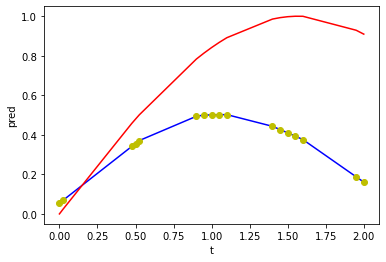

In [37]:
fig, axs = plt.subplots(1)
axs.set_xlabel("t")
axs.set_ylabel("pred")
axs.plot(train_t, y_pred,"b")
axs.plot(train_t, [solution(t[0]) for t in train_t],"r")
axs.plot(train_t, y_pred,"yo")


In [ ]:
GradientDescent